# Tumour Detection using DNA Microarray Datasets

# Import Libaries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import pyreadr
import math
import csv

from tqdm import tqdm
from pathlib import Path
from pyreadr import read_r

# Configs

In [2]:
cwd = os.getcwd()
parent_dir = Path(cwd).parent.absolute()
root_dir = parent_dir.parent.absolute()
DATA_PATH = os.path.join(root_dir, 'Dataset')
FEATURES_PATH = os.path.join(DATA_PATH, 'Features')
LABELS_PATH = os.path.join(DATA_PATH, 'Labels', 'y.RData')
ANNO_PATH = os.path.join(DATA_PATH, 'Anno', 'anno.RData')
csv_filename = 'total_1.0.csv'
CSVS_PATH = os.path.join(DATA_PATH, 'csv')
CSV_FILE_PATH = os.path.join(CSVS_PATH, csv_filename)

# Prepare Data

(Get only the first outer fold and its 5 inner fold as the dataset to train and validate our model)

## Read data into dataframes

In [3]:
count = 0
stop = 1
for file_name in sorted(os.listdir(FEATURES_PATH)):
    file_path = os.path.join(FEATURES_PATH, file_name)
    print(file_path)  
    dict_features = pyreadr.read_r(file_path)
    df_train = dict_features['betas.train']
    df_test = dict_features['betas.test']
    count = count + 1
    if count == stop:
        break
    
df_labels = pyreadr.read_r(LABELS_PATH)['y']
df_anno = pyreadr.read_r(ANNO_PATH)['anno']
df_total = pd.concat([df_train, df_test])

/media/data/hungnt/work/Datasets/BTMD/Dataset/Features/.gitkeep


LibrdataError: Unable to read from file

In [ ]:
df_total

,cg22054918,cg16476975,cg03940848,cg25570913,cg02809746,cg01517680,cg04110886,cg18222083,cg05649108,cg08141395,...,cg16531622,cg26505478,cg06075311,cg19145082,cg26691179,cg04842161,cg07621803,cg21100077,cg00703120,cg00540828
5684819014_R03C02,0.947269,0.008453,0.123884,0.963694,0.494731,0.028322,0.055772,0.014548,0.038964,0.850487,...,0.466598,0.000000,0.209100,0.202847,0.225260,0.049959,0.949485,0.888074,0.679235,0.187460
5684819014_R05C02,0.719027,0.067590,0.000000,0.885362,0.772570,0.704825,0.170992,0.000000,0.809885,0.044992,...,0.684325,0.011448,0.090918,0.107293,0.170331,0.303312,0.932520,0.720423,0.812766,0.991197
5684819014_R06C02,0.986904,0.000000,0.038046,1.000000,0.975408,0.000217,0.079723,0.715507,0.996868,0.000000,...,0.319206,0.003699,0.292715,0.072444,0.454280,0.069150,0.926996,0.911045,0.844444,0.944158
5684819013_R05C02,0.163068,0.231008,0.000000,0.947795,0.714640,0.032332,0.091954,0.000000,0.871492,0.013984,...,0.561342,0.000000,0.085011,0.080590,0.303145,0.396163,0.645922,0.824696,0.680867,1.000000
5684819014_R03C01,0.972470,0.119748,0.008277,0.984159,0.914704,0.433428,0.014778,0.000502,0.951393,0.037316,...,0.719939,0.532789,0.398517,0.309837,0.129453,0.117355,0.093597,0.898011,0.917079,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200091640051_R01C02,0.071838,0.788916,0.518146,0.073368,0.917277,0.908486,1.000000,0.738451,0.022102,0.896812,...,0.173105,0.041958,0.834287,0.721935,0.846085,0.086545,0.425349,0.277112,0.253946,0.905899
200091640051_R04C02,0.879886,0.963159,0.829632,0.066611,0.929978,0.961191,0.862995,0.815590,0.902938,0.863093,...,0.377838,0.027656,0.719758,0.199823,0.859725,0.248218,0.339218,0.764695,0.268875,0.842302
200091640051_R06C02,0.183778,0.528951,0.839423,0.931243,0.748958,0.950534,0.166527,0.924846,0.749935,0.458329,...,0.839491,0.026221,0.737446,0.120581,0.700668,0.190458,0.935168,0.824159,0.871991,1.000000
200091640059_R02C01,0.036189,0.091265,0.030045,0.210802,0.017907,0.236162,0.620858,0.113647,0.197062,0.101033,...,0.501880,0.044161,0.087165,0.159322,0.288011,0.754489,0.829186,0.532604,0.829158,0.960378


In [ ]:
df_labels

,y
0,"GBM, G34"
1,"DMG, K27"
2,"DMG, K27"
3,"DMG, K27"
4,"DMG, K27"
...,...
2796,"PIN T, PB A"
2797,ANA PA
2798,ANA PA
2799,ANA PA


In [ ]:
# print(df_labels.iloc[0])

In [31]:
%% script false
df_anno

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_city,contact_zip/postal_code,contact_country,supplementary_file,supplementary_file.1,data_row_count,relation,material:ch1,methylation class:ch1,sentrix
rownames,,,,,,,,,,,,,,,,,,,,,
GSM2402854,"GBM, G34, sample 1 [reference set]",GSM2402854,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: GBM, G34",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"GBM, G34",5684819014_R03C02
GSM2402855,"DMG, K27, sample 2 [reference set]",GSM2402855,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R05C02
GSM2402856,"DMG, K27, sample 3 [reference set]",GSM2402856,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R06C02
GSM2402857,"DMG, K27, sample 4 [reference set]",GSM2402857,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819013_R05C02
GSM2402858,"DMG, K27, sample 5 [reference set]",GSM2402858,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: DMG, K27",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2402...,0,,Frozen,"DMG, K27",5684819014_R03C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2405653,"PIN T, PB A, sample 2797 [reference set]",GSM2405653,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,"methylation class: PIN T, PB A",...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,"PIN T, PB A",200078650174_R03C01
GSM2405654,"ANA PA, sample 2798 [reference set]",GSM2405654,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,methylation class: ANA PA,...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,ANA PA,200275560089_R06C02
GSM2405655,"ANA PA, sample 2799 [reference set]",GSM2405655,Public on Jan 14 2018,Nov 25 2016,Jan 18 2018,genomic,1,brain tumor,Homo sapiens,methylation class: ANA PA,...,Heidelberg,69120,Germany,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2405...,0,,FFPE,ANA PA,200275560098_R02C02


In [32]:
# print('Train: ', df_train.shape, '\nTest:', df_test.shape, '\nTotal: ', df_total.shape, '\nLabels: ', df_labels.shape, '\nAnno: ', df_anno.shape)

## Create csv files

In [33]:
titles_list = list(df_anno.loc[:, 'title'])
titles_list = [','.join(label.split(',')[:-1]) for label in titles_list]
titles_list[-6:-1]

['LGG, DIG/DIA', 'PIN T,  PB A', 'ANA PA', 'ANA PA', 'ANA PA']

In [34]:
# print(dict(pd.Series(list_labels).value_counts()))

In [35]:
df_link = df_anno.loc[:, ['title', 'sentrix']]
df_link.loc[:, 'title'] = df_link['title'].replace(list(df_link['title']), titles_list)
df_link

,title,sentrix
rownames,,
GSM2402854,"GBM, G34",5684819014_R03C02
GSM2402855,"DMG, K27",5684819014_R05C02
GSM2402856,"DMG, K27",5684819014_R06C02
GSM2402857,"DMG, K27",5684819013_R05C02
GSM2402858,"DMG, K27",5684819014_R03C01
...,...,...
GSM2405653,"PIN T, PB A",200078650174_R03C01
GSM2405654,ANA PA,200275560089_R06C02
GSM2405655,ANA PA,200275560098_R02C02


In [36]:
dict_link = {sentrix: title for sentrix, title in zip(df_link['sentrix'], df_link['title'])}
dict_link

{'5684819014_R03C02': 'GBM, G34',
 '5684819014_R05C02': 'DMG, K27',
 '5684819014_R06C02': 'DMG, K27',
 '5684819013_R05C02': 'DMG, K27',
 '5684819014_R03C01': 'DMG, K27',
 '5684819014_R01C02': 'GBM, G34',
 '5911815001_R04C01': 'GBM, G34',
 '5911815001_R03C01': 'DMG, K27',
 '5911815001_R02C01': 'GBM, G34',
 '5684819013_R04C01': 'DMG, K27',
 '5684819013_R03C02': 'DMG, K27',
 '5684819014_R02C02': 'DMG, K27',
 '5684819013_R02C01': 'ATRT, SHH',
 '5684819013_R05C01': 'GBM, G34',
 '5911815023_R01C01': 'CONTR, CEBM',
 '5911815023_R02C01': 'CONTR, CEBM',
 '5684819026_R01C02': 'GBM, MYCN',
 '5911815001_R03C02': 'DMG, K27',
 '5911815023_R04C01': 'CONTR, CEBM',
 '5911815023_R05C01': 'CONTR, CEBM',
 '5911815023_R06C01': 'CONTR, CEBM',
 '5684819026_R02C01': 'DMG, K27',
 '6164621155_R05C02': 'GBM, G34',
 '6164621081_R06C02': 'GBM, G34',
 '6164621131_R02C02': 'GBM, G34',
 '6164621081_R06C01': 'DMG, K27',
 '6164621081_R04C02': 'GBM, G34',
 '6164621155_R03C01': 'DMG, K27',
 '6164621131_R02C01': 'GBM, G34

In [37]:
dict_link['200078650174_R03C01']

'PIN T,  PB A'

In [38]:
list_labels = [dict_link[id] for id in list(df_total.index)]
list_labels

['GBM, G34',
 'DMG, K27',
 'DMG, K27',
 'DMG, K27',
 'DMG, K27',
 'GBM, G34',
 'DMG, K27',
 'GBM, G34',
 'DMG, K27',
 'DMG, K27',
 'GBM, G34',
 'CONTR, CEBM',
 'CONTR, CEBM',
 'GBM, MYCN',
 'DMG, K27',
 'CONTR, CEBM',
 'CONTR, CEBM',
 'GBM, G34',
 'GBM, G34',
 'DMG, K27',
 'GBM, G34',
 'DMG, K27',
 'GBM, G34',
 'GBM, G34',
 'LGG, PA PF',
 'LGG, PA PF',
 'CONTR, REACT',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA PF',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'ATRT, SHH',
 'ATRT, TYR',
 'ATRT, TYR',
 'ATRT, TYR',
 'ATRT, MYC',
 'LGG, PA/GG ST',
 'LGG, PA PF',
 'LGG, PA PF',
 'CONTR, REACT',
 'LGG, PA MID',
 'LGG, PA MID',
 'LGG, PA PF',
 'LGG, PA PF',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'MB, WNT',
 'MB, G4',
 'MB, G4',
 'MB, SHH INF',
 'MB, SHH CHL AD',
 'MB, SHH INF',
 'MB, G3',
 'MB,

In [39]:
# Add label column
df_total['label'] = list_labels
df_total

,cg22054918,cg16476975,cg03940848,cg25570913,cg02809746,cg01517680,cg04110886,cg18222083,cg05649108,cg08141395,...,cg26505478,cg06075311,cg19145082,cg26691179,cg04842161,cg07621803,cg21100077,cg00703120,cg00540828,label
5684819014_R03C02,0.947269,0.008453,0.123884,0.963694,0.494731,0.028322,0.055772,0.014548,0.038964,0.850487,...,0.000000,0.209100,0.202847,0.225260,0.049959,0.949485,0.888074,0.679235,0.187460,"GBM, G34"
5684819014_R05C02,0.719027,0.067590,0.000000,0.885362,0.772570,0.704825,0.170992,0.000000,0.809885,0.044992,...,0.011448,0.090918,0.107293,0.170331,0.303312,0.932520,0.720423,0.812766,0.991197,"DMG, K27"
5684819014_R06C02,0.986904,0.000000,0.038046,1.000000,0.975408,0.000217,0.079723,0.715507,0.996868,0.000000,...,0.003699,0.292715,0.072444,0.454280,0.069150,0.926996,0.911045,0.844444,0.944158,"DMG, K27"
5684819013_R05C02,0.163068,0.231008,0.000000,0.947795,0.714640,0.032332,0.091954,0.000000,0.871492,0.013984,...,0.000000,0.085011,0.080590,0.303145,0.396163,0.645922,0.824696,0.680867,1.000000,"DMG, K27"
5684819014_R03C01,0.972470,0.119748,0.008277,0.984159,0.914704,0.433428,0.014778,0.000502,0.951393,0.037316,...,0.532789,0.398517,0.309837,0.129453,0.117355,0.093597,0.898011,0.917079,1.000000,"DMG, K27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200091640051_R01C02,0.071838,0.788916,0.518146,0.073368,0.917277,0.908486,1.000000,0.738451,0.022102,0.896812,...,0.041958,0.834287,0.721935,0.846085,0.086545,0.425349,0.277112,0.253946,0.905899,"ENB, A"
200091640051_R04C02,0.879886,0.963159,0.829632,0.066611,0.929978,0.961191,0.862995,0.815590,0.902938,0.863093,...,0.027656,0.719758,0.199823,0.859725,0.248218,0.339218,0.764695,0.268875,0.842302,"ENB, A"
200091640051_R06C02,0.183778,0.528951,0.839423,0.931243,0.748958,0.950534,0.166527,0.924846,0.749935,0.458329,...,0.026221,0.737446,0.120581,0.700668,0.190458,0.935168,0.824159,0.871991,1.000000,"A IDH, HG"
200091640059_R02C01,0.036189,0.091265,0.030045,0.210802,0.017907,0.236162,0.620858,0.113647,0.197062,0.101033,...,0.044161,0.087165,0.159322,0.288011,0.754489,0.829186,0.532604,0.829158,0.960378,"LGG, DIG/DIA"


In [40]:
csv_filepath = os.path.join(CSVS_PATH, 'total.csv')
columns = list(df_total.columns)
index = list(df_total.index)
df_total.to_csv(CSV_FILE_PATH, index=True)

## Check the excel file

In [41]:
df_total_test = pd.read_csv(CSV_FILE_PATH, index_col=0)
df_total_test

,cg22054918,cg16476975,cg03940848,cg25570913,cg02809746,cg01517680,cg04110886,cg18222083,cg05649108,cg08141395,...,cg26505478,cg06075311,cg19145082,cg26691179,cg04842161,cg07621803,cg21100077,cg00703120,cg00540828,label
5684819014_R03C02,0.947269,0.008453,0.123884,0.963694,0.494731,0.028322,0.055772,0.014548,0.038964,0.850487,...,0.000000,0.209100,0.202847,0.225260,0.049959,0.949485,0.888074,0.679235,0.187460,"GBM, G34"
5684819014_R05C02,0.719027,0.067590,0.000000,0.885362,0.772570,0.704825,0.170992,0.000000,0.809885,0.044992,...,0.011448,0.090918,0.107293,0.170331,0.303312,0.932520,0.720423,0.812766,0.991197,"DMG, K27"
5684819014_R06C02,0.986904,0.000000,0.038046,1.000000,0.975408,0.000217,0.079723,0.715507,0.996868,0.000000,...,0.003699,0.292715,0.072444,0.454280,0.069150,0.926996,0.911045,0.844444,0.944158,"DMG, K27"
5684819013_R05C02,0.163068,0.231008,0.000000,0.947795,0.714640,0.032332,0.091954,0.000000,0.871492,0.013984,...,0.000000,0.085011,0.080590,0.303145,0.396163,0.645922,0.824696,0.680867,1.000000,"DMG, K27"
5684819014_R03C01,0.972470,0.119748,0.008277,0.984159,0.914704,0.433428,0.014778,0.000502,0.951393,0.037316,...,0.532789,0.398517,0.309837,0.129453,0.117355,0.093597,0.898011,0.917079,1.000000,"DMG, K27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200091640051_R01C02,0.071838,0.788916,0.518146,0.073368,0.917277,0.908486,1.000000,0.738451,0.022102,0.896812,...,0.041958,0.834287,0.721935,0.846085,0.086545,0.425349,0.277112,0.253946,0.905899,"ENB, A"
200091640051_R04C02,0.879886,0.963159,0.829632,0.066611,0.929978,0.961191,0.862995,0.815590,0.902938,0.863093,...,0.027656,0.719758,0.199823,0.859725,0.248218,0.339218,0.764695,0.268875,0.842302,"ENB, A"
200091640051_R06C02,0.183778,0.528951,0.839423,0.931243,0.748958,0.950534,0.166527,0.924846,0.749935,0.458329,...,0.026221,0.737446,0.120581,0.700668,0.190458,0.935168,0.824159,0.871991,1.000000,"A IDH, HG"
200091640059_R02C01,0.036189,0.091265,0.030045,0.210802,0.017907,0.236162,0.620858,0.113647,0.197062,0.101033,...,0.044161,0.087165,0.159322,0.288011,0.754489,0.829186,0.532604,0.829158,0.960378,"LGG, DIG/DIA"


In [42]:
df_total

,cg22054918,cg16476975,cg03940848,cg25570913,cg02809746,cg01517680,cg04110886,cg18222083,cg05649108,cg08141395,...,cg26505478,cg06075311,cg19145082,cg26691179,cg04842161,cg07621803,cg21100077,cg00703120,cg00540828,label
5684819014_R03C02,0.947269,0.008453,0.123884,0.963694,0.494731,0.028322,0.055772,0.014548,0.038964,0.850487,...,0.000000,0.209100,0.202847,0.225260,0.049959,0.949485,0.888074,0.679235,0.187460,"GBM, G34"
5684819014_R05C02,0.719027,0.067590,0.000000,0.885362,0.772570,0.704825,0.170992,0.000000,0.809885,0.044992,...,0.011448,0.090918,0.107293,0.170331,0.303312,0.932520,0.720423,0.812766,0.991197,"DMG, K27"
5684819014_R06C02,0.986904,0.000000,0.038046,1.000000,0.975408,0.000217,0.079723,0.715507,0.996868,0.000000,...,0.003699,0.292715,0.072444,0.454280,0.069150,0.926996,0.911045,0.844444,0.944158,"DMG, K27"
5684819013_R05C02,0.163068,0.231008,0.000000,0.947795,0.714640,0.032332,0.091954,0.000000,0.871492,0.013984,...,0.000000,0.085011,0.080590,0.303145,0.396163,0.645922,0.824696,0.680867,1.000000,"DMG, K27"
5684819014_R03C01,0.972470,0.119748,0.008277,0.984159,0.914704,0.433428,0.014778,0.000502,0.951393,0.037316,...,0.532789,0.398517,0.309837,0.129453,0.117355,0.093597,0.898011,0.917079,1.000000,"DMG, K27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200091640051_R01C02,0.071838,0.788916,0.518146,0.073368,0.917277,0.908486,1.000000,0.738451,0.022102,0.896812,...,0.041958,0.834287,0.721935,0.846085,0.086545,0.425349,0.277112,0.253946,0.905899,"ENB, A"
200091640051_R04C02,0.879886,0.963159,0.829632,0.066611,0.929978,0.961191,0.862995,0.815590,0.902938,0.863093,...,0.027656,0.719758,0.199823,0.859725,0.248218,0.339218,0.764695,0.268875,0.842302,"ENB, A"
200091640051_R06C02,0.183778,0.528951,0.839423,0.931243,0.748958,0.950534,0.166527,0.924846,0.749935,0.458329,...,0.026221,0.737446,0.120581,0.700668,0.190458,0.935168,0.824159,0.871991,1.000000,"A IDH, HG"
200091640059_R02C01,0.036189,0.091265,0.030045,0.210802,0.017907,0.236162,0.620858,0.113647,0.197062,0.101033,...,0.044161,0.087165,0.159322,0.288011,0.754489,0.829186,0.532604,0.829158,0.960378,"LGG, DIG/DIA"


In [43]:
df_total.equals(df_total_test)
df_total.compare(df_total_test)

cg22054918           cg16476975           cg03940848  \
                          self     other       self     other       self   
5684819014_R03C02          NaN       NaN   0.008453  0.008453   0.123884   
5684819014_R05C02          NaN       NaN   0.067590  0.067590        NaN   
5684819014_R06C02          NaN       NaN        NaN       NaN   0.038046   
5684819013_R05C02          NaN       NaN        NaN       NaN        NaN   
5684819014_R03C01          NaN       NaN   0.119748  0.119748   0.008277   
...                        ...       ...        ...       ...        ...   
200091640051_R01C02   0.071838  0.071838        NaN       NaN        NaN   
200091640051_R04C02        NaN       NaN        NaN       NaN        NaN   
200091640051_R06C02   0.183778  0.183778        NaN       NaN        NaN   
200091640059_R02C01   0.036189  0.036189   0.091265  0.091265   0.030045   
200275560089_R06C02   0.181451  0.181451        NaN       NaN   0.027880   

                              cg25570913           cg02809746            ...  \
                        other       self     other       self     other  ...   
5684819014_R03C02    0.123884        NaN       NaN   0.494731  0.494731  ...   
5684819014_R05C02         NaN        NaN       NaN        NaN       NaN  ...   
5684819014_R06C02    0.038046        NaN       NaN        NaN       NaN  ...   
5684819013_R05C02         NaN        NaN       NaN        NaN       NaN  ...   
5684819014_R03C01    0.008277        NaN       NaN   0.914704  0.914704  ...   
...                       ...        ...       ...        ...       ...  ...   
200091640051_R01C02       NaN   0.073368  0.073368   0.917277  0.917277  ...   
200091640051_R04C02       NaN        NaN       NaN        NaN       NaN  ...   
200091640051_R06C02       NaN        NaN       NaN        NaN       NaN  ...   
200091640059_R02C01  0.030045   0.210802  0.210802   0.017907  0.017907  ...   
200275560089_R06C02  0.027880        NaN       NaN   0.031423  0.031423  ...   

                    cg04842161           cg07621803           cg21100077  \
                          self     other       self     other       self   
5684819014_R03C02     0.049959  0.049959   0.949485  0.949485        NaN   
5684819014_R05C02     0.303312  0.303312   0.932520  0.932520        NaN   
5684819014_R06C02     0.069150  0.069150   0.926996  0.926996   0.911045   
5684819013_R05C02     0.396163  0.396163        NaN       NaN        NaN   
5684819014_R03C01     0.117355  0.117355   0.093597  0.093597        NaN   
...                        ...       ...        ...       ...        ...   
200091640051_R01C02        NaN       NaN        NaN       NaN        NaN   
200091640051_R04C02   0.248218  0.248218   0.339218  0.339218        NaN   
200091640051_R06C02        NaN       NaN   0.935168  0.935168        NaN   
200091640059_R02C01        NaN       NaN        NaN       NaN        NaN   
200275560089_R06C02        NaN       NaN        NaN       NaN        NaN   

                              cg00703120       cg00540828            
                        other       self other       self     other  
5684819014_R03C02         NaN        NaN   NaN        NaN       NaN  
5684819014_R05C02         NaN        NaN   NaN   0.991197  0.991197  
5684819014_R06C02    0.911045        NaN   NaN   0.944158  0.944158  
5684819013_R05C02         NaN        NaN   NaN        NaN       NaN  
5684819014_R03C01         NaN        NaN   NaN        NaN       NaN  
...                       ...        ...   ...        ...       ...  
200091640051_R01C02       NaN        NaN   NaN   0.905899  0.905899  
200091640051_R04C02       NaN        NaN   NaN        NaN       NaN  
200091640051_R06C02       NaN        NaN   NaN        NaN       NaN  
200091640059_R02C01       NaN        NaN   NaN   0.960378  0.960378  
200275560089_R06C02       NaN        NaN   NaN   0.985406  0.985406  

[2801 rows x 20000 columns]

In [44]:
print(df_total_test.loc['5684819014_R03C02', 'cg16476975'], type(df_total_test.loc['5684819014_R03C02', 'cg16476975']))
print(df_total.loc['5684819014_R03C02', 'cg16476975'], type(df_total.loc['5684819014_R03C02', 'cg16476975']))

0.0084527504457505 <class 'numpy.float64'>
0.00845275044575051 <class 'numpy.float64'>


We can see the two dataframes are different in some of the numeric values. This is caused by rounding procedure, it does not affect the data very much

In [45]:
distribution = dict(df_total['label'].value_counts())
distribution

{'GBM, RTK II': 143,
 'MB, G4': 138,
 'LGG, PA PF': 114,
 'EPN, PF A': 91,
 'MNG': 90,
 'MB, SHH CHL AD': 84,
 'O IDH': 80,
 'A IDH': 78,
 'DMG, K27': 78,
 'MB, G3': 77,
 'EPN, RELA': 70,
 'GBM, RTK I': 64,
 'GBM, MES': 56,
 'MB, SHH INF': 52,
 'EPN, PF B': 51,
 'ATRT, SHH': 46,
 'A IDH, HG': 46,
 'PLEX, PED B': 46,
 'LGG, DNT': 44,
 'PXA': 44,
 'ETMR': 43,
 'GBM, G34': 41,
 'MB, WNT': 39,
 'CNS NB, FOXR2': 39,
 'LGG, PA MID': 38,
 'SUBEPN, PF': 37,
 'ATRT, TYR': 37,
 'ATRT, MYC': 29,
 'PITUI': 29,
 'EPN, MPE': 28,
 'EPN, SPINE': 27,
 'CPH, ADM': 25,
 'HMB': 25,
 'LGG, PA/GG ST': 24,
 'CONTR, INFLAM': 24,
 'ENB, A': 23,
 'CONTR, REACT': 23,
 'SCHW': 23,
 'HGNET, BCOR': 23,
 'PLEX, AD': 22,
 'LGG, MYB': 22,
 'PTPR, B': 22,
 'PIN T,  PB B': 22,
 'LGG, GG': 21,
 'PITAD, FSH LH': 21,
 'LGG, SEGA': 21,
 'ANA PA': 21,
 'CN': 21,
 'HGNET, MN1': 21,
 'CPH, PAP': 20,
 'RETB': 19,
 'PIN T, PPT': 19,
 'SUBEPN, ST': 19,
 'PGG, nC': 19,
 'PITAD, ACTH': 18,
 'PITAD, STH SPA': 17,
 'GBM, MYCN': 16,
 

In [46]:
labels = list(distribution.keys())
n_samples = list(distribution.values())

[Text(0, 0, 'GBM, RTK II'),
 Text(1, 0, 'MB, G4'),
 Text(2, 0, 'LGG, PA PF'),
 Text(3, 0, 'EPN, PF A'),
 Text(4, 0, 'MNG'),
 Text(5, 0, 'MB, SHH CHL AD'),
 Text(6, 0, 'O IDH'),
 Text(7, 0, 'A IDH'),
 Text(8, 0, 'DMG, K27'),
 Text(9, 0, 'MB, G3'),
 Text(10, 0, 'EPN, RELA'),
 Text(11, 0, 'GBM, RTK I'),
 Text(12, 0, 'GBM, MES'),
 Text(13, 0, 'MB, SHH INF'),
 Text(14, 0, 'EPN, PF B'),
 Text(15, 0, 'ATRT, SHH'),
 Text(16, 0, 'A IDH, HG'),
 Text(17, 0, 'PLEX, PED B'),
 Text(18, 0, 'LGG, DNT'),
 Text(19, 0, 'PXA'),
 Text(20, 0, 'ETMR'),
 Text(21, 0, 'GBM, G34'),
 Text(22, 0, 'MB, WNT'),
 Text(23, 0, 'CNS NB, FOXR2'),
 Text(24, 0, 'LGG, PA MID'),
 Text(25, 0, 'SUBEPN, PF'),
 Text(26, 0, 'ATRT, TYR'),
 Text(27, 0, 'ATRT, MYC'),
 Text(28, 0, 'PITUI'),
 Text(29, 0, 'EPN, MPE'),
 Text(30, 0, 'EPN, SPINE'),
 Text(31, 0, 'CPH, ADM'),
 Text(32, 0, 'HMB'),
 Text(33, 0, 'LGG, PA/GG ST'),
 Text(34, 0, 'CONTR, INFLAM'),
 Text(35, 0, 'ENB, A'),
 Text(36, 0, 'CONTR, REACT'),
 Text(37, 0, 'SCHW'),
 Text(38,

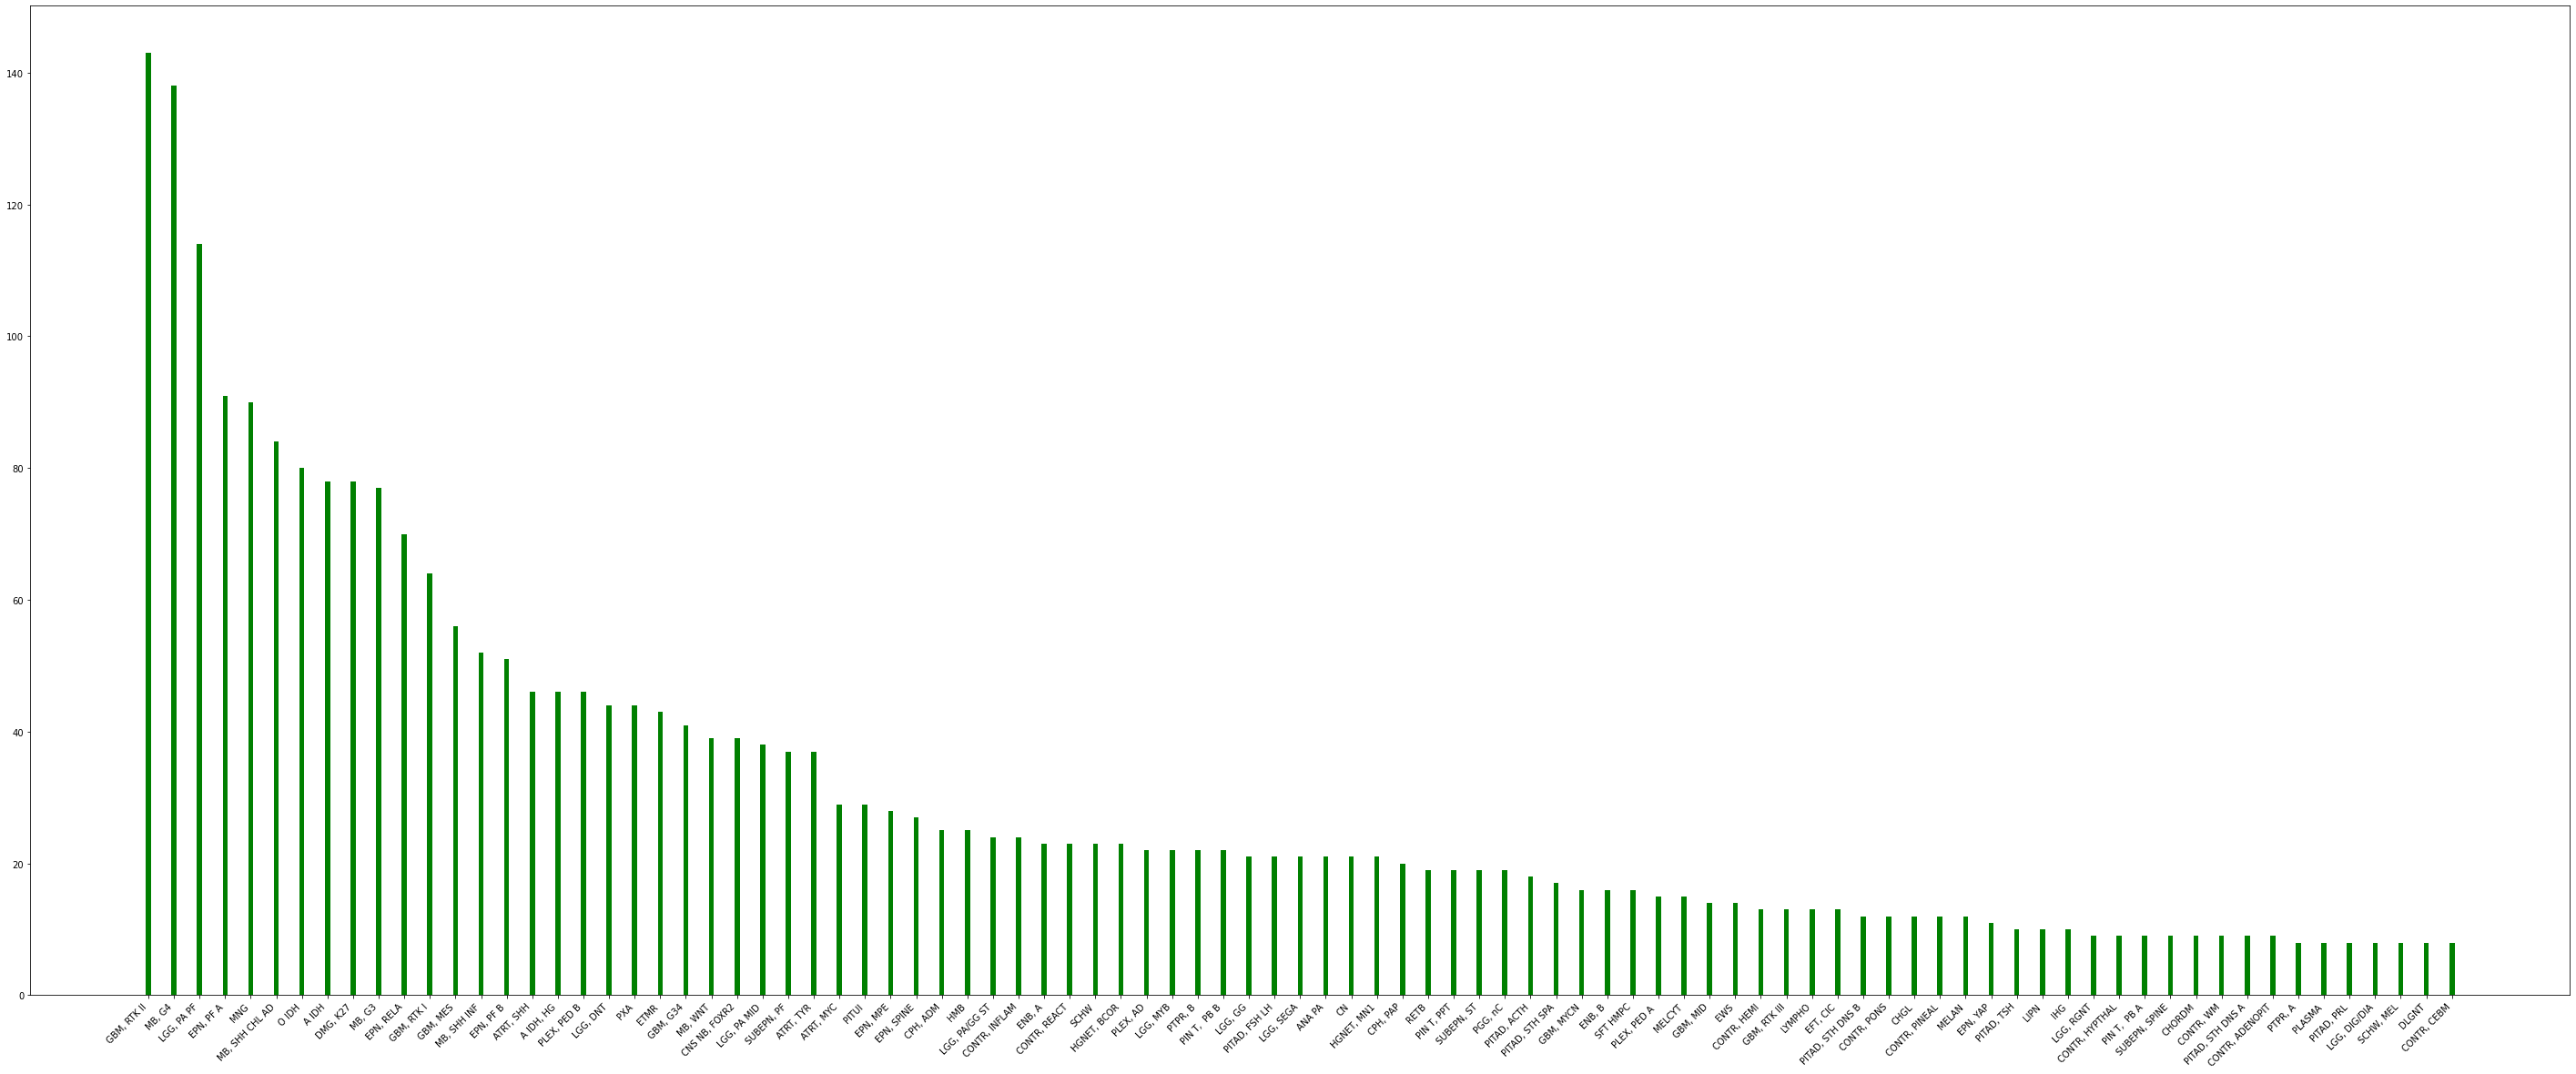

In [47]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(50)
column_width = 0.2
x_index = np.arange(len(labels))
rect = ax.bar(x = labels, height = n_samples, width = column_width, color = "green")
ax.set_xticks(x_index)
ax.set_xticklabels(labels = labels, rotation = 45, ha = 'right')

# References

[1]: [How to Replace Values in Pandas DataFrame](https://datatofish.com/replace-values-pandas-dataframe/)

[2]: [How to write to csv file using Python](https://www.pythontutorial.net/python-basics/python-write-csv-file/)